# Data Understanding

Notebook ini berisi analisis pemahaman data untuk dataset Iris klasik yang akan digunakan untuk klasifikasi spesies bunga iris.

## 1. Import Library dan Load Dataset

In [1]:
# Install required packages
%pip install seaborn

# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import PyCaret untuk EDA dan classification
try:
    from pycaret.datasets import get_data
    from pycaret.classification import *
    from pycaret.anomaly import *
    print("PyCaret berhasil diimport")
except ImportError:
    print("PyCaret tidak tersedia. Install dengan: pip install pycaret")

# Atur style untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")

print("Library berhasil diimport")

PyCaret berhasil diimport
Library berhasil diimport


In [2]:
# Load dataset Iris dari file CSV atau PyCaret
try:
    # Coba load dari file lokal
    df = pd.read_csv('data_iris.csv', delimiter=';')
    
    # Konversi kolom numerik yang menggunakan koma sebagai decimal separator
    numeric_columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
    
    for col in numeric_columns:
        if col in df.columns:
            # Konversi koma ke titik untuk decimal
            df[col] = df[col].astype(str).str.replace(',', '.').astype(float)
    
    # Buat kolom species numerik dan species name
    df['species'] = df['Class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
    df['species_name'] = df['Class'].map({'Iris-setosa': 'setosa', 'Iris-versicolor': 'versicolor', 'Iris-virginica': 'virginica'})
    
    # Rename kolom untuk konsistensi dengan format sklearn
    df = df.rename(columns={
        'sepal length': 'sepal length (cm)',
        'sepal width': 'sepal width (cm)', 
        'petal length': 'petal length (cm)',
        'petal width': 'petal width (cm)'
    })
    
    # Drop kolom yang tidak diperlukan
    if 'id' in df.columns:
        df = df.drop('id', axis=1)
    
    print("Dataset Iris berhasil dimuat dari data_iris.csv")
    
except FileNotFoundError:
    # Jika file tidak ditemukan, gunakan dataset Iris dari PyCaret
    print("File lokal tidak ditemukan. Menggunakan dataset Iris dari PyCaret...")
    try:
        df = get_data('iris')
        df['species'] = df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
        df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
        print("Dataset Iris berhasil dimuat dari PyCaret")
    except:
        print("Error: Tidak dapat memuat dataset dari PyCaret")

print(f"Ukuran dataset: {df.shape[0]} baris, {df.shape[1]} kolom")
print(f"Kolom dataset: {list(df.columns)}")
df.head()

Dataset Iris berhasil dimuat dari data_iris.csv
Ukuran dataset: 150 baris, 7 kolom
Kolom dataset: ['Class', 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species', 'species_name']


,Class,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,Iris-setosa,5.1,3.5,1.4,0.2,0,setosa
1,Iris-setosa,4.9,3.0,1.4,0.2,0,setosa
2,Iris-setosa,4.7,3.2,1.3,0.2,0,setosa
3,Iris-setosa,4.6,3.1,1.5,0.2,0,setosa
4,Iris-setosa,5.0,3.6,1.4,0.2,0,setosa


## 2. Informasi Dasar Dataset

In [3]:
# Informasi umum dataset
print("=== INFORMASI DATASET IRIS ===")
print(f"Jumlah sampel: {len(df)}")
print(f"Jumlah fitur: {len(df.columns)-2} (tanpa target)")
print(f"Jumlah kelas: {df['species'].nunique()}")
print("\n=== INFO DATAFRAME ===")
df.info()

=== INFORMASI DATASET IRIS ===
Jumlah sampel: 150
Jumlah fitur: 5 (tanpa target)
Jumlah kelas: 3

=== INFO DATAFRAME ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Class              150 non-null    object 
 1   sepal length (cm)  150 non-null    float64
 2   sepal width (cm)   150 non-null    float64
 3   petal length (cm)  150 non-null    float64
 4   petal width (cm)   150 non-null    float64
 5   species            150 non-null    int64  
 6   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 8.3+ KB


In [4]:
# Deskripsi variabel
print("=== DESKRIPSI VARIABEL ===")
print("\n Fitur-fitur dalam dataset:")
feature_descriptions = {
    'sepal length (cm)': 'Panjang sepal (kelopak bunga) dalam cm',
    'sepal width (cm)': 'Lebar sepal (kelopak bunga) dalam cm', 
    'petal length (cm)': 'Panjang petal (mahkota bunga) dalam cm',
    'petal width (cm)': 'Lebar petal (mahkota bunga) dalam cm'
}

for feature, description in feature_descriptions.items():
    print(f"• {feature}: {description}")
    
print("\n Target variable:")
print("• species: Spesies bunga iris (setosa, versicolor, virginica)")

=== DESKRIPSI VARIABEL ===

 Fitur-fitur dalam dataset:
• sepal length (cm): Panjang sepal (kelopak bunga) dalam cm
• sepal width (cm): Lebar sepal (kelopak bunga) dalam cm
• petal length (cm): Panjang petal (mahkota bunga) dalam cm
• petal width (cm): Lebar petal (mahkota bunga) dalam cm

 Target variable:
• species: Spesies bunga iris (setosa, versicolor, virginica)


## 3. Mengecek Tipe Data dan Jenis Variabel

In [5]:
# Analisis jenis variabel berdasarkan klasifikasi
print("=== KLASIFIKASI JENIS VARIABEL ===")
print("\n Teori Jenis Variabel:")
print("• Quantitative (Numerik): Nilai angka, bisa dihitung")
print("• Qualitative (Kategorikal/Faktor): Klasifikasi atau kategori")
print("• Discrete: Nilai terpisah (tanpa nilai antara)")
print("• Continuous: Nilai kontinu (bisa pecahan)")

print("\n" + "="*60)
print("            ANALISIS VARIABEL DATASET IRIS")
print("="*60)

# Analisis setiap variabel
variable_analysis = {
    'sepal length (cm)': {
        'tipe_data': str(df['sepal length (cm)'].dtype),
        'jenis_variabel': 'Quantitative (Numerik)',
        'sub_kategori': 'Continuous',
        'deskripsi': 'Nilai kontinu, bisa berupa pecahan',
        'contoh_nilai': df['sepal length (cm)'].head(3).tolist(),
        'rentang': f"{df['sepal length (cm)'].min():.1f} - {df['sepal length (cm)'].max():.1f} cm"
    },
    'sepal width (cm)': {
        'tipe_data': str(df['sepal width (cm)'].dtype),
        'jenis_variabel': 'Quantitative (Numerik)',
        'sub_kategori': 'Continuous',
        'deskripsi': 'Nilai kontinu, bisa berupa pecahan',
        'contoh_nilai': df['sepal width (cm)'].head(3).tolist(),
        'rentang': f"{df['sepal width (cm)'].min():.1f} - {df['sepal width (cm)'].max():.1f} cm"
    },
    'petal length (cm)': {
        'tipe_data': str(df['petal length (cm)'].dtype),
        'jenis_variabel': 'Quantitative (Numerik)',
        'sub_kategori': 'Continuous',
        'deskripsi': 'Nilai kontinu, bisa berupa pecahan',
        'contoh_nilai': df['petal length (cm)'].head(3).tolist(),
        'rentang': f"{df['petal length (cm)'].min():.1f} - {df['petal length (cm)'].max():.1f} cm"
    },
    'petal width (cm)': {
        'tipe_data': str(df['petal width (cm)'].dtype),
        'jenis_variabel': 'Quantitative (Numerik)',
        'sub_kategori': 'Continuous',
        'deskripsi': 'Nilai kontinu, bisa berupa pecahan',
        'contoh_nilai': df['petal width (cm)'].head(3).tolist(),
        'rentang': f"{df['petal width (cm)'].min():.1f} - {df['petal width (cm)'].max():.1f} cm"
    },
    'species': {
        'tipe_data': str(df['species'].dtype),
        'jenis_variabel': 'Qualitative (Kategorikal)',
        'sub_kategori': 'Discrete (Nominal)',
        'deskripsi': 'Kategori terpisah, tidak ada urutan',
        'contoh_nilai': df['species'].unique().tolist(),
        'rentang': f"{df['species'].nunique()} kategori (0, 1, 2)"
    },
}

# Tampilkan analisis setiap variabel
for i, (var_name, analysis) in enumerate(variable_analysis.items(), 1):
    print(f"\n{i}.  VARIABEL: {var_name.upper()}")
    print(f"   • Tipe Data: {analysis['tipe_data']}")
    print(f"   • Jenis Variabel: {analysis['jenis_variabel']}")
    print(f"   • Sub-kategori: {analysis['sub_kategori']}")
    print(f"   • Deskripsi: {analysis['deskripsi']}")
    print(f"   • Contoh nilai: {analysis['contoh_nilai']}")
    print(f"   • Rentang: {analysis['rentang']}")
    print("   " + "-"*40)

=== KLASIFIKASI JENIS VARIABEL ===

 Teori Jenis Variabel:
• Quantitative (Numerik): Nilai angka, bisa dihitung
• Qualitative (Kategorikal/Faktor): Klasifikasi atau kategori
• Discrete: Nilai terpisah (tanpa nilai antara)
• Continuous: Nilai kontinu (bisa pecahan)

            ANALISIS VARIABEL DATASET IRIS

1.  VARIABEL: SEPAL LENGTH (CM)
   • Tipe Data: float64
   • Jenis Variabel: Quantitative (Numerik)
   • Sub-kategori: Continuous
   • Deskripsi: Nilai kontinu, bisa berupa pecahan
   • Contoh nilai: [5.1, 4.9, 4.7]
   • Rentang: 4.3 - 7.9 cm
   ----------------------------------------

2.  VARIABEL: SEPAL WIDTH (CM)
   • Tipe Data: float64
   • Jenis Variabel: Quantitative (Numerik)
   • Sub-kategori: Continuous
   • Deskripsi: Nilai kontinu, bisa berupa pecahan
   • Contoh nilai: [3.5, 3.0, 3.2]
   • Rentang: 2.0 - 4.4 cm
   ----------------------------------------

3.  VARIABEL: PETAL LENGTH (CM)
   • Tipe Data: float64
   • Jenis Variabel: Quantitative (Numerik)
   • Sub-katego

In [6]:
# Buat tabel ringkasan jenis variabel
print("\n=== TABEL RINGKASAN JENIS VARIABEL ===")

# Buat DataFrame untuk ringkasan
summary_data = []
for var_name, analysis in variable_analysis.items():
    summary_data.append({
        'Nama Variabel': var_name,
        'Tipe Data': analysis['tipe_data'],
        'Jenis Variabel': analysis['jenis_variabel'],
        'Sub-kategori': analysis['sub_kategori'],
        'Rentang/Kategori': analysis['rentang']
    })

summary_df = pd.DataFrame(summary_data)
print("\n Tabel Ringkasan:")
print(summary_df.to_string(index=False))


=== TABEL RINGKASAN JENIS VARIABEL ===

 Tabel Ringkasan:
    Nama Variabel Tipe Data            Jenis Variabel       Sub-kategori     Rentang/Kategori
sepal length (cm)   float64    Quantitative (Numerik)         Continuous         4.3 - 7.9 cm
 sepal width (cm)   float64    Quantitative (Numerik)         Continuous         2.0 - 4.4 cm
petal length (cm)   float64    Quantitative (Numerik)         Continuous         1.0 - 6.9 cm
 petal width (cm)   float64    Quantitative (Numerik)         Continuous         0.1 - 2.5 cm
          species     int64 Qualitative (Kategorikal) Discrete (Nominal) 3 kategori (0, 1, 2)


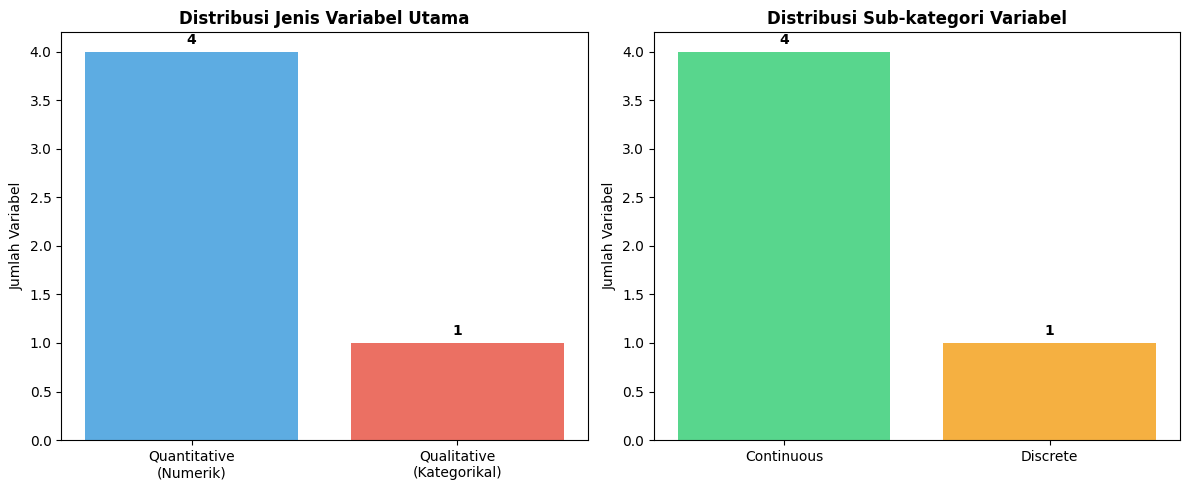

In [7]:
# Visualisasi distribusi tipe variabel
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Hitung jumlah setiap jenis variabel
quantitative_count = sum(1 for analysis in variable_analysis.values() 
                        if 'Quantitative' in analysis['jenis_variabel'])
qualitative_count = sum(1 for analysis in variable_analysis.values() 
                       if 'Qualitative' in analysis['jenis_variabel'])

continuous_count = sum(1 for analysis in variable_analysis.values() 
                      if 'Continuous' in analysis['sub_kategori'])
discrete_count = sum(1 for analysis in variable_analysis.values() 
                    if 'Discrete' in analysis['sub_kategori'])

# Plot 1: Jenis Variabel Utama
categories = ['Quantitative\n(Numerik)', 'Qualitative\n(Kategorikal)']
counts = [quantitative_count, qualitative_count]
colors = ['#3498db', '#e74c3c']

bars1 = axes[0].bar(categories, counts, color=colors, alpha=0.8)
axes[0].set_title('Distribusi Jenis Variabel Utama', fontweight='bold')
axes[0].set_ylabel('Jumlah Variabel')

# Tambahkan nilai di atas bar
for bar, count in zip(bars1, counts):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
                str(count), ha='center', va='bottom', fontweight='bold')

# Plot 2: Sub-kategori
subcategories = ['Continuous', 'Discrete']
subcounts = [continuous_count, discrete_count]
subcolors = ['#2ecc71', '#f39c12']

bars2 = axes[1].bar(subcategories, subcounts, color=subcolors, alpha=0.8)
axes[1].set_title('Distribusi Sub-kategori Variabel', fontweight='bold')
axes[1].set_ylabel('Jumlah Variabel')

# Tambahkan nilai di atas bar
for bar, count in zip(bars2, subcounts):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
                str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [8]:
# Insight dan kesimpulan tipe data
print("\n" + "="*70)
print("                🔍 INSIGHT JENIS VARIABEL")
print("="*70)

print(f"\n RINGKASAN STATISTIK TIPE VARIABEL:")
print(f"   • Total variabel: {len(variable_analysis)}")
print(f"   • Quantitative (Numerik): {quantitative_count} variabel")
print(f"   • Qualitative (Kategorikal): {qualitative_count} variabel")
print(f"   • Continuous: {continuous_count} variabel")
print(f"   • Discrete: {discrete_count} variabel")

print(f"\n KARAKTERISTIK DATASET:")
print(f"   • Dataset didominasi oleh variabel numerik continuous (fitur pengukuran)")
print(f"   • Semua fitur prediktif adalah quantitative continuous")
print(f"   • Target variable bersifat qualitative discrete (kategori)")
print(f"   • Cocok untuk algoritma machine learning supervised")

print(f"\n IMPLIKASI UNTUK ANALISIS:")
print(f"   • Dapat menggunakan statistik deskriptif (mean, std, dll)")
print(f"   • Perlu normalisasi/standardisasi untuk beberapa algoritma")
print(f"   • Target encoding sudah tersedia (numerik dan nama)")
print(f"   • Siap untuk analisis korelasi dan visualisasi scatter plot")

print("\n" + "="*70)


                🔍 INSIGHT JENIS VARIABEL

 RINGKASAN STATISTIK TIPE VARIABEL:
   • Total variabel: 5
   • Quantitative (Numerik): 4 variabel
   • Qualitative (Kategorikal): 1 variabel
   • Continuous: 4 variabel
   • Discrete: 1 variabel

 KARAKTERISTIK DATASET:
   • Dataset didominasi oleh variabel numerik continuous (fitur pengukuran)
   • Semua fitur prediktif adalah quantitative continuous
   • Target variable bersifat qualitative discrete (kategori)
   • Cocok untuk algoritma machine learning supervised

 IMPLIKASI UNTUK ANALISIS:
   • Dapat menggunakan statistik deskriptif (mean, std, dll)
   • Perlu normalisasi/standardisasi untuk beberapa algoritma
   • Target encoding sudah tersedia (numerik dan nama)
   • Siap untuk analisis korelasi dan visualisasi scatter plot



## 4. Eksplorasi Data Awal

In [9]:
# Statistik deskriptif
print("=== STATISTIK DESKRIPTIF ===")
stats = df.describe()
print(stats.round(2))

=== STATISTIK DESKRIPTIF ===
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count             150.00            150.00             150.00   
mean                5.84              3.05               3.76   
std                 0.83              0.43               1.76   
min                 4.30              2.00               1.00   
25%                 5.10              2.80               1.60   
50%                 5.80              3.00               4.35   
75%                 6.40              3.30               5.10   
max                 7.90              4.40               6.90   

       petal width (cm)  species  
count            150.00   150.00  
mean               1.20     1.00  
std                0.76     0.82  
min                0.10     0.00  
25%                0.30     0.00  
50%                1.30     1.00  
75%                1.80     2.00  
max                2.50     2.00  


In [10]:
# Distribusi kelas
print("=== DISTRIBUSI KELAS ===")
class_counts = df['species'].value_counts()
print(class_counts)
print("\n Persentase:")
class_percentage = df['species'].value_counts(normalize=True) * 100
for species, percentage in class_percentage.items():
    print(f"• {species}: {percentage:.1f}%")

=== DISTRIBUSI KELAS ===
species
0    50
1    50
2    50
Name: count, dtype: int64

 Persentase:
• 0: 33.3%
• 1: 33.3%
• 2: 33.3%


In [11]:
# Cek missing values
print("=== CEK MISSING VALUES ===")
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("\n Dataset tidak memiliki missing values")
else:
    print(f"\n Total missing values: {missing_values.sum()}")

=== CEK MISSING VALUES ===
Class                0
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64

 Dataset tidak memiliki missing values


In [12]:
# Cek duplikasi data
print("=== CEK DUPLIKASI DATA ===")
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

if duplicates == 0:
    print(" Tidak ada data duplikat")
else:
    print(f" Terdapat {duplicates} baris duplikat")

=== CEK DUPLIKASI DATA ===
Jumlah baris duplikat: 3
 Terdapat 3 baris duplikat


## 5. Analisis Distribusi Data

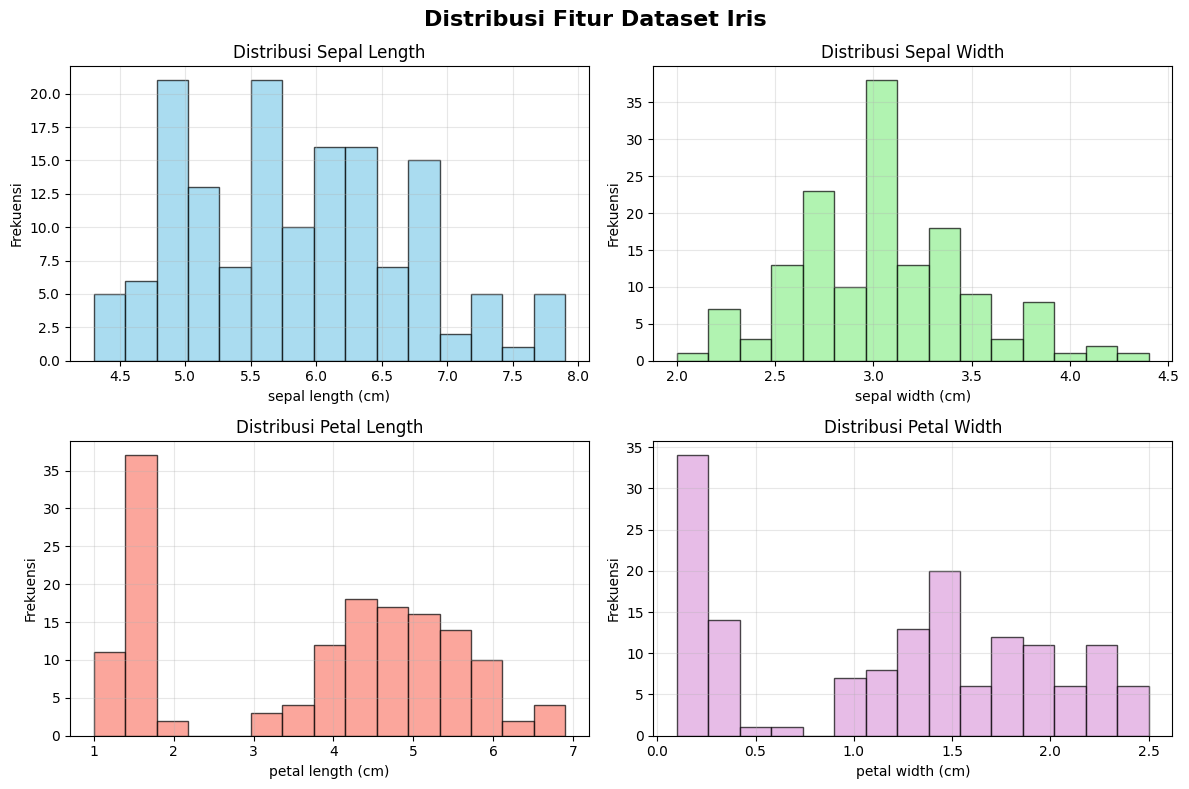

In [13]:
# Visualisasi distribusi fitur
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribusi Fitur Dataset Iris', fontsize=16, fontweight='bold')

features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']

for i, (feature, color) in enumerate(zip(features, colors)):
    row = i // 2
    col = i % 2
    
    axes[row, col].hist(df[feature], bins=15, color=color, alpha=0.7, edgecolor='black')
    axes[row, col].set_title(f'Distribusi {feature.split("(")[0].strip().title()}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frekuensi')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

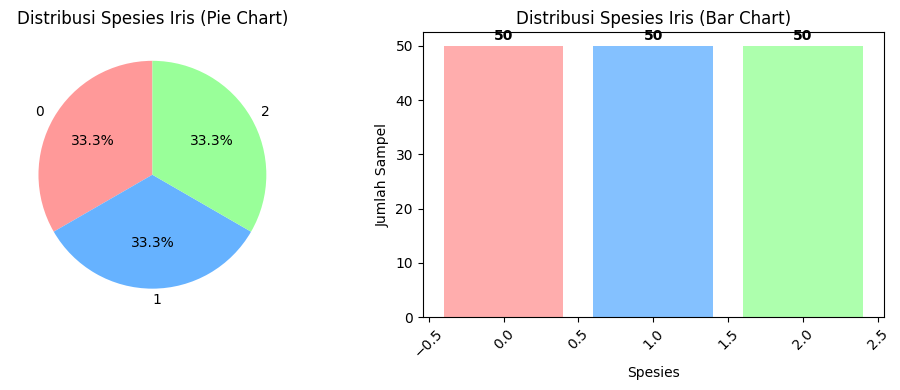

In [14]:
# Distribusi kelas
plt.figure(figsize=(10, 4))

# Pie chart
plt.subplot(1, 2, 1)
class_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                 colors=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Distribusi Spesies Iris (Pie Chart)')
plt.ylabel('')

# Bar chart
plt.subplot(1, 2, 2)
bars = plt.bar(class_counts.index, class_counts.values, 
               color=['#FF9999', '#66B2FF', '#99FF99'], alpha=0.8)
plt.title('Distribusi Spesies Iris (Bar Chart)')
plt.xlabel('Spesies')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=45)

# Tambahkan nilai di atas bar
for bar, count in zip(bars, class_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Analisis Korelasi Antar Fitur

In [15]:
# Matriks korelasi
correlation_matrix = df[features].corr()
print("=== MATRIKS KORELASI ===")
print(correlation_matrix.round(3))

=== MATRIKS KORELASI ===
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)              1.000            -0.109              0.872   
sepal width (cm)              -0.109             1.000             -0.421   
petal length (cm)              0.872            -0.421              1.000   
petal width (cm)               0.818            -0.357              0.963   

                   petal width (cm)  
sepal length (cm)             0.818  
sepal width (cm)             -0.357  
petal length (cm)             0.963  
petal width (cm)              1.000  


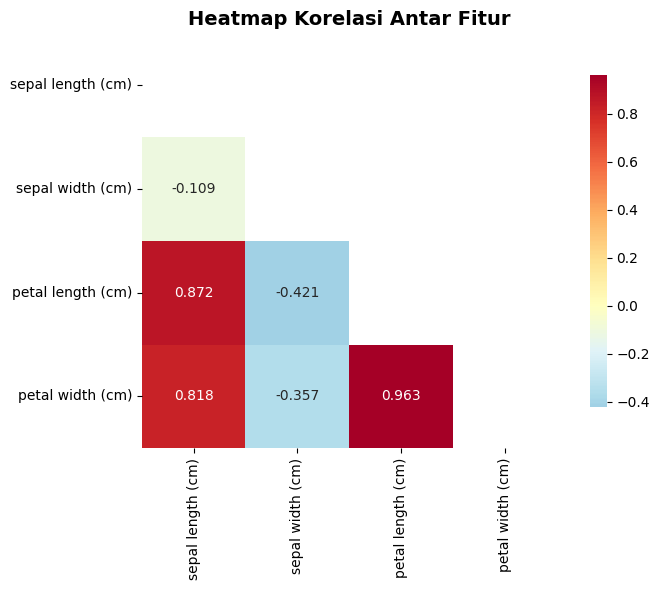

In [16]:
# Heatmap korelasi
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8},
            mask=mask)
plt.title('Heatmap Korelasi Antar Fitur', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [17]:
# Analisis korelasi tertinggi
print("=== ANALISIS KORELASI TERTINGGI ===")
correlation_pairs = []
for i in range(len(features)):
    for j in range(i+1, len(features)):
        corr_value = correlation_matrix.iloc[i, j]
        correlation_pairs.append((features[i], features[j], corr_value))

# Sort berdasarkan nilai absolut korelasi
correlation_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

print("\n🔍 Pasangan fitur dengan korelasi tertinggi:")
for i, (feat1, feat2, corr) in enumerate(correlation_pairs[:3]):
    status = "Korelasi Positif Kuat" if corr > 0.7 else "Korelasi Positif Sedang" if corr > 0.3 else "Korelasi Lemah"
    print(f"{i+1}. {feat1.split('(')[0].strip()} vs {feat2.split('(')[0].strip()}: {corr:.3f} ({status})")

=== ANALISIS KORELASI TERTINGGI ===

🔍 Pasangan fitur dengan korelasi tertinggi:
1. petal length vs petal width: 0.963 (Korelasi Positif Kuat)
2. sepal length vs petal length: 0.872 (Korelasi Positif Kuat)
3. sepal length vs petal width: 0.818 (Korelasi Positif Kuat)


## 7. Analisis per Spesies

In [18]:
# Statistik per spesies
print("=== STATISTIK DESKRIPTIF PER SPESIES ===")

# Map numeric species to names
species_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

for species in df['species'].unique():
    species_name = species_names[species]
    print(f"\n📊 Spesies: {species_name.upper()}")
    species_data = df[df['species'] == species][features]
    print(species_data.describe().round(2))

=== STATISTIK DESKRIPTIF PER SPESIES ===

📊 Spesies: SETOSA
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count              50.00             50.00              50.00   
mean                5.01              3.42               1.46   
std                 0.35              0.38               0.17   
min                 4.30              2.30               1.00   
25%                 4.80              3.12               1.40   
50%                 5.00              3.40               1.50   
75%                 5.20              3.68               1.58   
max                 5.80              4.40               1.90   

       petal width (cm)  
count             50.00  
mean               0.24  
std                0.11  
min                0.10  
25%                0.20  
50%                0.20  
75%                0.30  
max                0.60  

📊 Spesies: VERSICOLOR
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count              50.00        

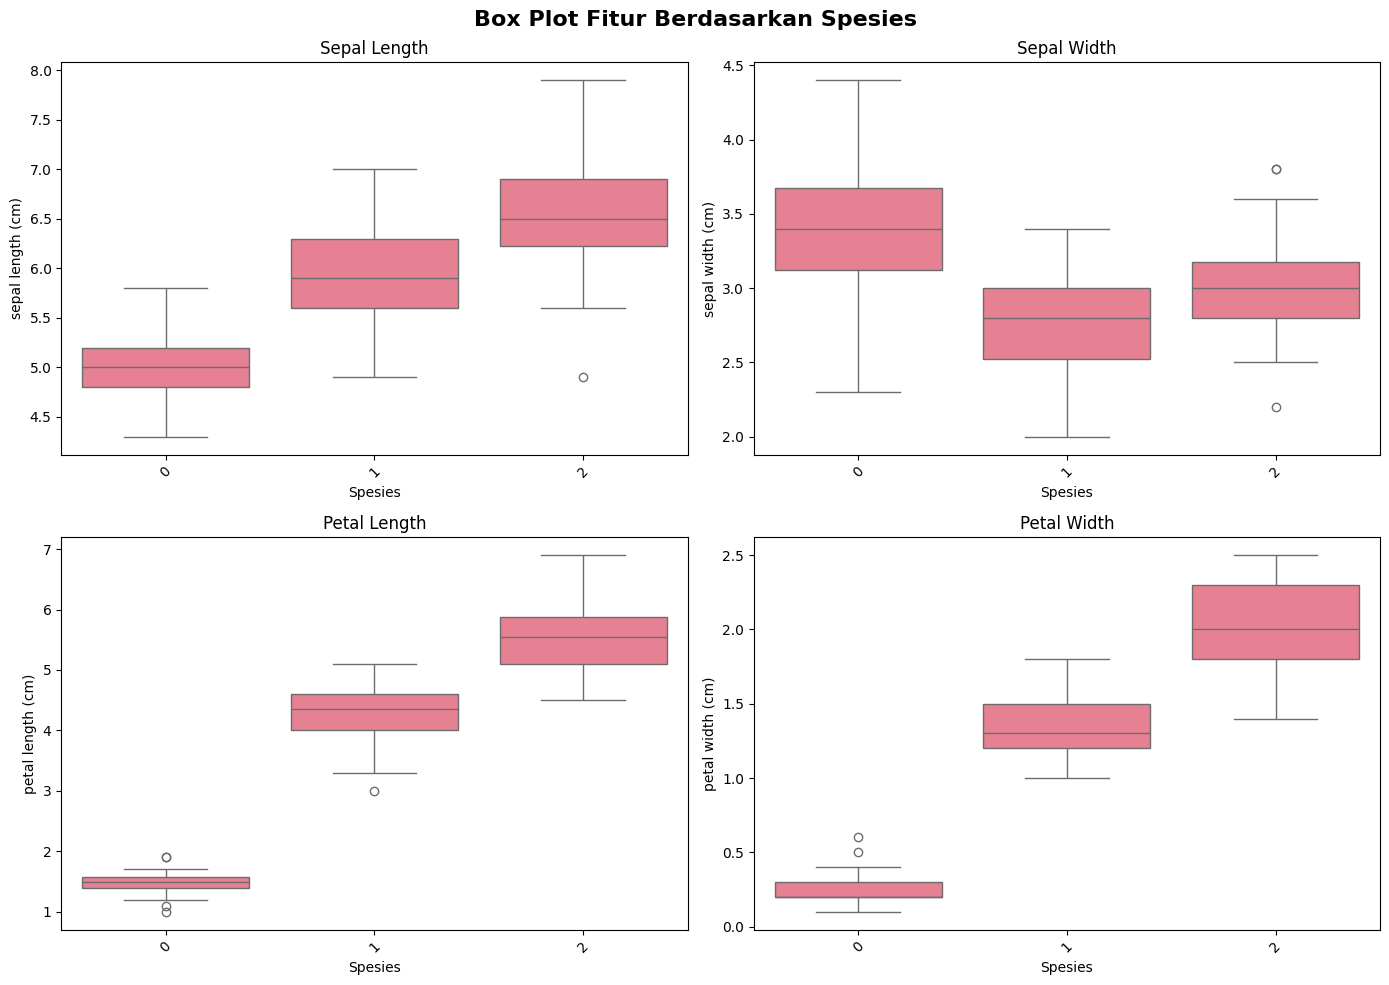

In [19]:
# Box plot per spesies
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Box Plot Fitur Berdasarkan Spesies', fontsize=16, fontweight='bold')

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    
    sns.boxplot(data=df, x='species', y=feature, ax=axes[row, col])
    axes[row, col].set_title(f'{feature.split("(")[0].strip().title()}')
    axes[row, col].set_xlabel('Spesies')
    axes[row, col].set_ylabel(feature)
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 8. Deteksi Outlier dengan PyCaret Multi-Model (ABOD, KNN, COF)

In [20]:
# Setup PyCaret environment dan Multi-Model Outlier Detection
print("=== DETEKSI OUTLIER DENGAN PYCARET MULTI-MODEL ===")
print("Models: ABOD (Angle-Based), KNN (K-Nearest Neighbors), COF (Connectivity-based)")

try:
    # Persiapkan data untuk anomaly detection (hanya fitur numerik)
    anomaly_data = df[features].copy()
    
    # Setup PyCaret anomaly detection environment
    print("\n[SETUP] Mempersiapkan environment PyCaret untuk anomaly detection...")
    try:
        # Try new PyCaret version syntax
        anomaly_setup = setup(
            data=anomaly_data,
            session_id=123,
            verbose=False
        )
    except TypeError:
        # Fallback for older PyCaret versions
        try:
            anomaly_setup = setup(
                data=anomaly_data,
                session_id=123,
                silent=True
            )
        except TypeError:
            # Minimal setup for compatibility
            anomaly_setup = setup(data=anomaly_data, session_id=123)
    
    # Dictionary untuk menyimpan hasil semua model
    outlier_results = {}
    model_objects = {}
    
    # Model yang akan digunakan
    models_to_use = {
        'abod': 'ABOD (Angle-Based Outlier Detection)',
        'knn': 'KNN (K-Nearest Neighbors)',
        'cof': 'COF (Connectivity-based Outlier Factor)'
    }
    
    print(f"\n[MODELS] Membuat dan menjalankan {len(models_to_use)} model outlier detection...")
    
    # Loop untuk setiap model
    for model_name, model_description in models_to_use.items():
        try:
            print(f"\n🔍 {model_description}:")
            
            # Create model
            print(f"   [CREATE] Membuat model {model_name.upper()}...")
            model = create_model(model_name)
            model_objects[model_name] = model
            
            # Assign outliers using model
            print(f"   [PREDICT] Mendeteksi outliers dengan {model_name.upper()}...")
            results = assign_model(model)
            
            # Analisis hasil
            outlier_labels = results['Anomaly'].values
            outlier_scores = results['Anomaly_Score'].values
            
            # Hitung statistik
            n_outliers = sum(outlier_labels == 1)
            n_normal = sum(outlier_labels == 0)
            outlier_percentage = (n_outliers / len(df)) * 100
            
            # Simpan hasil
            outlier_results[model_name] = {
                'labels': outlier_labels,
                'scores': outlier_scores,
                'n_outliers': n_outliers,
                'n_normal': n_normal,
                'percentage': outlier_percentage,
                'outlier_indices': results[results['Anomaly'] == 1].index.tolist()
            }
            
            # Tampilkan hasil
            print(f"   [HASIL] Hasil {model_name.upper()}:")
            print(f"      • Outliers: {n_outliers} ({outlier_percentage:.1f}%)")
            print(f"      • Normal: {n_normal} ({100-outlier_percentage:.1f}%)")
            print(f"      • Index outliers: {outlier_results[model_name]['outlier_indices']}")
            
        except Exception as e:
            print(f"   [ERROR] Gagal menjalankan {model_name.upper()}: {e}")
            # Buat data dummy jika model gagal
            outlier_results[model_name] = {
                'labels': np.zeros(len(df)),
                'scores': np.zeros(len(df)),
                'n_outliers': 0,
                'n_normal': len(df),
                'percentage': 0.0,
                'outlier_indices': []
            }
    
    # Tambahkan hasil ke DataFrame utama
    for model_name in models_to_use.keys():
        df[f'{model_name}_outlier'] = outlier_results[model_name]['labels']
        df[f'{model_name}_score'] = outlier_results[model_name]['scores']
    
    print(f"\n[SUCCESS] Multi-model outlier detection berhasil!")
    print(f"[INFO] Hasil tersimpan dalam kolom: {[f'{m}_outlier' for m in models_to_use.keys()]}")
    
except Exception as e:
    print(f"[ERROR] Gagal menjalankan multi-model detection: {e}")
    print("Kemungkinan PyCaret belum terinstall atau ada masalah dengan dependencies")
    print("Install PyCaret dengan: pip install pycaret")
    
    # Fallback: buat kolom dummy untuk semua model
    for model_name in ['abod', 'knn', 'cof']:
        df[f'{model_name}_outlier'] = 0
        df[f'{model_name}_score'] = 0.0
    
    outlier_results = {}

=== DETEKSI OUTLIER DENGAN PYCARET MULTI-MODEL ===
Models: ABOD (Angle-Based), KNN (K-Nearest Neighbors), COF (Connectivity-based)

[SETUP] Mempersiapkan environment PyCaret untuk anomaly detection...



[MODELS] Membuat dan menjalankan 3 model outlier detection...

🔍 ABOD (Angle-Based Outlier Detection):
   [CREATE] Membuat model ABOD...


   [PREDICT] Mendeteksi outliers dengan ABOD...
   [HASIL] Hasil ABOD:
      • Outliers: 8 (5.3%)
      • Normal: 142 (94.7%)
      • Index outliers: [41, 62, 100, 106, 108, 117, 131, 134]

🔍 KNN (K-Nearest Neighbors):
   [CREATE] Membuat model KNN...


   [PREDICT] Mendeteksi outliers dengan KNN...
   [HASIL] Hasil KNN:
      • Outliers: 8 (5.3%)
      • Normal: 142 (94.7%)
      • Index outliers: [41, 57, 98, 106, 109, 117, 118, 131]

🔍 COF (Connectivity-based Outlier Factor):
   [CREATE] Membuat model COF...


   [PREDICT] Mendeteksi outliers dengan COF...
   [HASIL] Hasil COF:
      • Outliers: 8 (5.3%)
      • Normal: 142 (94.7%)
      • Index outliers: [14, 15, 22, 33, 41, 44, 106, 117]

[SUCCESS] Multi-model outlier detection berhasil!
[INFO] Hasil tersimpan dalam kolom: ['abod_outlier', 'knn_outlier', 'cof_outlier']


In [21]:
# Analisis Perbandingan Multi-Model dan Consensus Scoring
print("=== ANALISIS PERBANDINGAN MULTI-MODEL ===")

try:
    if outlier_results and len(outlier_results) > 0:
        # Ringkasan hasil semua model
        print("\n[RINGKASAN] Perbandingan Hasil Model:")
        print(f"{'Model':<8} {'Outliers':<10} {'Percentage':<12} {'Top Indices'}")
        print("-" * 55)
        
        for model_name, results in outlier_results.items():
            top_indices = str(results['outlier_indices'][:5]).replace('[', '').replace(']', '')
            if len(results['outlier_indices']) > 5:
                top_indices += "..."
            print(f"{model_name.upper():<8} {results['n_outliers']:<10} {results['percentage']:<11.1f}% {top_indices}")
        
        # Consensus Analysis - hitung berapa model yang setuju
        print(f"\n[CONSENSUS] Analisis Konsensus Model:")
        
        # Buat matriks consensus
        consensus_matrix = np.zeros(len(df))
        model_names = list(outlier_results.keys())
        
        for model_name in model_names:
            consensus_matrix += outlier_results[model_name]['labels']
        
        # Analisis tingkat kesepakatan
        consensus_counts = np.bincount(consensus_matrix.astype(int))
        print(f"   • Semua model setuju (normal): {consensus_counts[0] if 0 < len(consensus_counts) else 0} data")
        
        for i in range(1, len(consensus_counts)):
            if consensus_counts[i] > 0:
                print(f"   • {i} model deteksi outlier: {consensus_counts[i]} data")
        
        # Strong consensus outliers (minimal 2 model setuju)
        strong_consensus_mask = consensus_matrix >= 2
        strong_consensus_indices = df[strong_consensus_mask].index.tolist()
        strong_consensus_count = len(strong_consensus_indices)
        
        print(f"\n[STRONG CONSENSUS] Outliers dengan ≥2 model setuju:")
        print(f"   • Jumlah: {strong_consensus_count} ({(strong_consensus_count/len(df)*100):.1f}%)")
        print(f"   • Index: {strong_consensus_indices}")
        
        # Perfect consensus outliers (semua model setuju)
        perfect_consensus_mask = consensus_matrix == len(model_names)
        perfect_consensus_indices = df[perfect_consensus_mask].index.tolist()
        perfect_consensus_count = len(perfect_consensus_indices)
        
        print(f"\n[PERFECT CONSENSUS] Outliers dengan semua model setuju:")
        print(f"   • Jumlah: {perfect_consensus_count} ({(perfect_consensus_count/len(df)*100):.1f}%)")
        print(f"   • Index: {perfect_consensus_indices}")
        
        # Tambahkan kolom consensus ke DataFrame
        df['consensus_score'] = consensus_matrix
        df['strong_consensus'] = strong_consensus_mask.astype(int)
        df['perfect_consensus'] = perfect_consensus_mask.astype(int)
        
        # Analisis karakteristik outliers berdasarkan consensus
        if strong_consensus_count > 0:
            print(f"\n[KARAKTERISTIK] Outliers dengan Strong Consensus:")
            strong_outliers = df[strong_consensus_mask]
            
            # Distribusi per spesies
            species_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
            for species in df['species'].unique():
                species_outliers = strong_outliers[strong_outliers['species'] == species]
                total_species = len(df[df['species'] == species])
                percentage = (len(species_outliers) / total_species) * 100
                print(f"   • {species_names[species]}: {len(species_outliers)} outliers ({percentage:.1f}%)")
            
            # Statistik fitur outliers
            print(f"\n[STATISTIK] Strong Consensus Outliers vs Normal Data:")
            normal_data = df[~strong_consensus_mask]
            
            for feature in features:
                outlier_mean = strong_outliers[feature].mean()
                normal_mean = normal_data[feature].mean()
                diff_pct = ((outlier_mean - normal_mean) / normal_mean) * 100
                
                if abs(diff_pct) > 5:
                    direction = "higher" if diff_pct > 0 else "lower"
                    print(f"   • {feature.split('(')[0].strip()}: {diff_pct:+.1f}% {direction} than normal")
        
        # Model Agreement Matrix
        print(f"\n[AGREEMENT] Matriks Kesepakatan Antar Model:")
        agreement_matrix = np.zeros((len(model_names), len(model_names)))
        
        for i, model1 in enumerate(model_names):
            for j, model2 in enumerate(model_names):
                if i != j:
                    # Hitung persentase kesepakatan
                    labels1 = outlier_results[model1]['labels']
                    labels2 = outlier_results[model2]['labels']
                    agreement = np.mean(labels1 == labels2) * 100
                    agreement_matrix[i, j] = agreement
                else:
                    agreement_matrix[i, j] = 100.0
        
        # Tampilkan matriks kesepakatan
        print(f"{'Model':<8}", end="")
        for model in model_names:
            print(f"{model.upper():<8}", end="")
        print()
        
        for i, model1 in enumerate(model_names):
            print(f"{model1.upper():<8}", end="")
            for j, model2 in enumerate(model_names):
                print(f"{agreement_matrix[i, j]:<7.1f}%", end="")
            print()
        
        print(f"\n[SUCCESS] Analisis perbandingan multi-model selesai!")
        
    else:
        print("[WARNING] Tidak ada hasil outlier detection yang tersedia untuk dibandingkan")
        
except Exception as e:
    print(f"[ERROR] Error dalam analisis perbandingan: {e}")
    
    # Fallback: buat kolom consensus dummy
    df['consensus_score'] = 0
    df['strong_consensus'] = 0
    df['perfect_consensus'] = 0

=== ANALISIS PERBANDINGAN MULTI-MODEL ===

[RINGKASAN] Perbandingan Hasil Model:
Model    Outliers   Percentage   Top Indices
-------------------------------------------------------
ABOD     8          5.3        % 41, 62, 100, 106, 108...
KNN      8          5.3        % 41, 57, 98, 106, 109...
COF      8          5.3        % 14, 15, 22, 33, 41...

[CONSENSUS] Analisis Konsensus Model:
   • Semua model setuju (normal): 133 data
   • 1 model deteksi outlier: 13 data
   • 2 model deteksi outlier: 1 data
   • 3 model deteksi outlier: 3 data

[STRONG CONSENSUS] Outliers dengan ≥2 model setuju:
   • Jumlah: 4 (2.7%)
   • Index: [41, 106, 117, 131]

[PERFECT CONSENSUS] Outliers dengan semua model setuju:
   • Jumlah: 3 (2.0%)
   • Index: [41, 106, 117]

[KARAKTERISTIK] Outliers dengan Strong Consensus:
   • setosa: 1 outliers (2.0%)
   • versicolor: 0 outliers (0.0%)
   • virginica: 3 outliers (6.0%)

[STATISTIK] Strong Consensus Outliers vs Normal Data:
   • sepal length: +7.2% higher tha

=== VISUALISASI MULTI-MODEL OUTLIER DETECTION ===

[VIZ 1] Perbandingan Outliers per Model pada Feature Pairs...


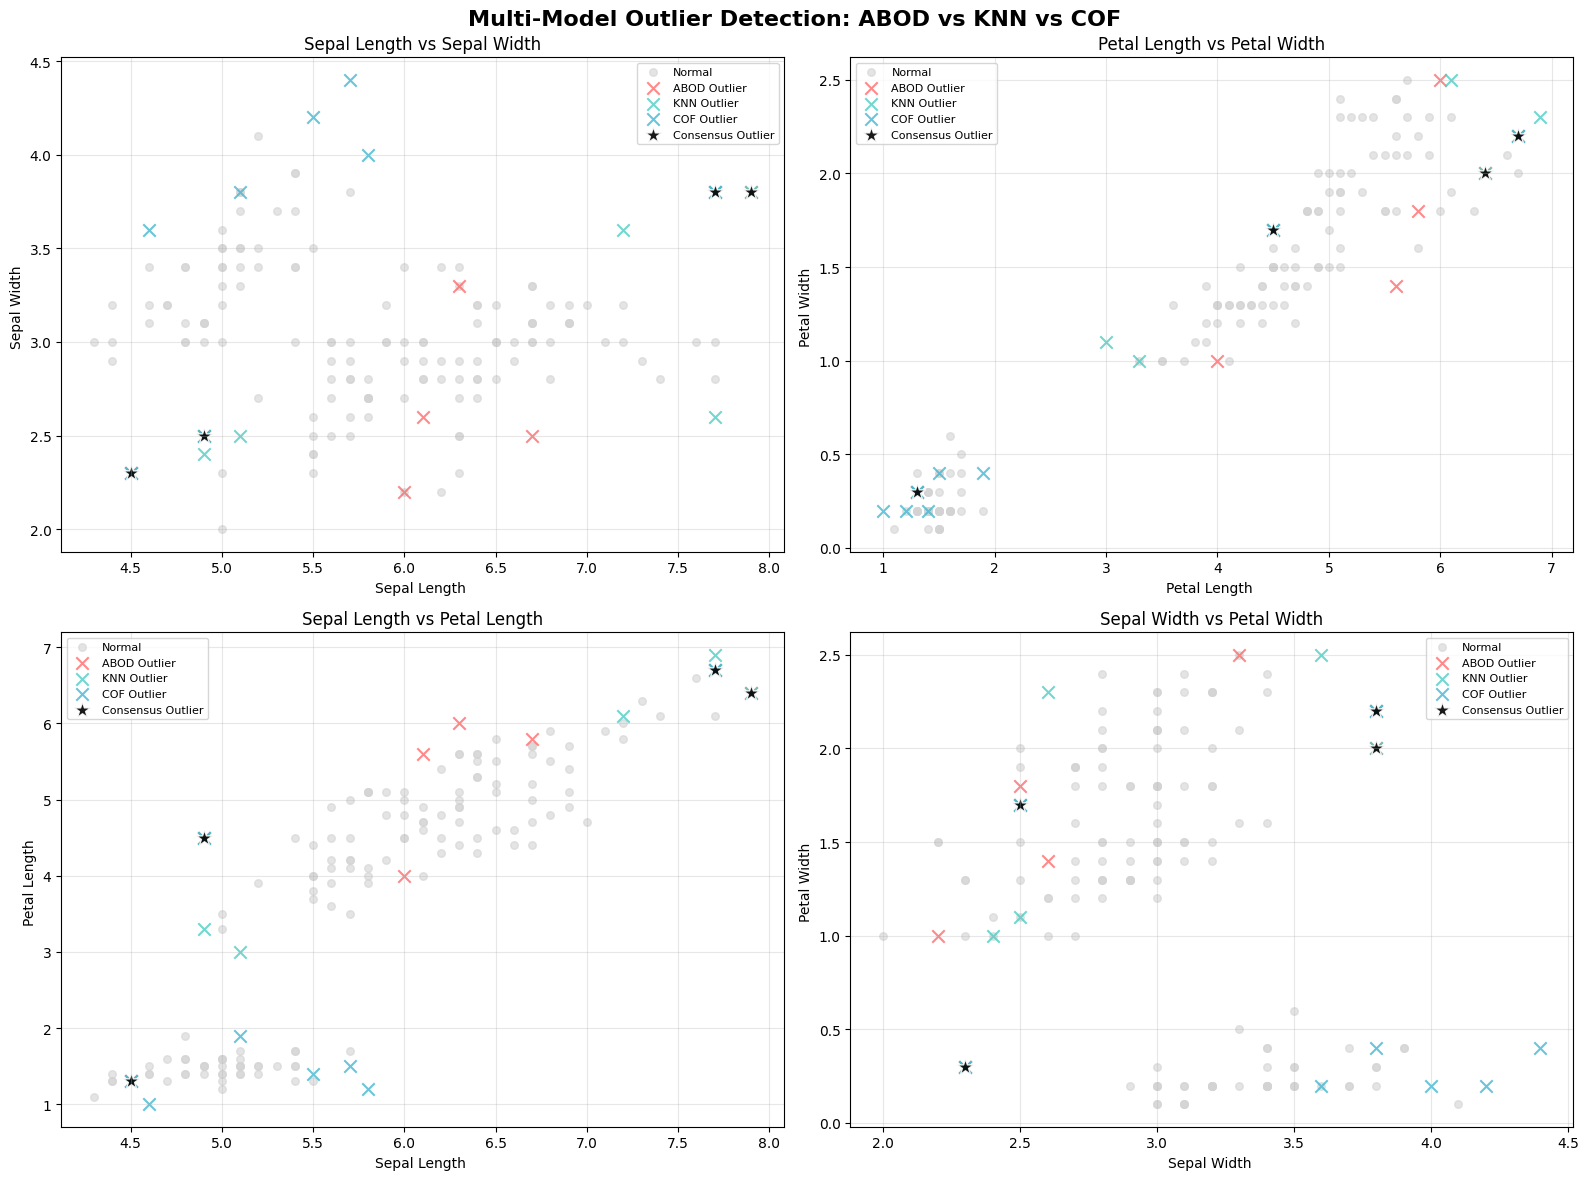


[VIZ 2] Distribusi Anomaly Scores per Model...


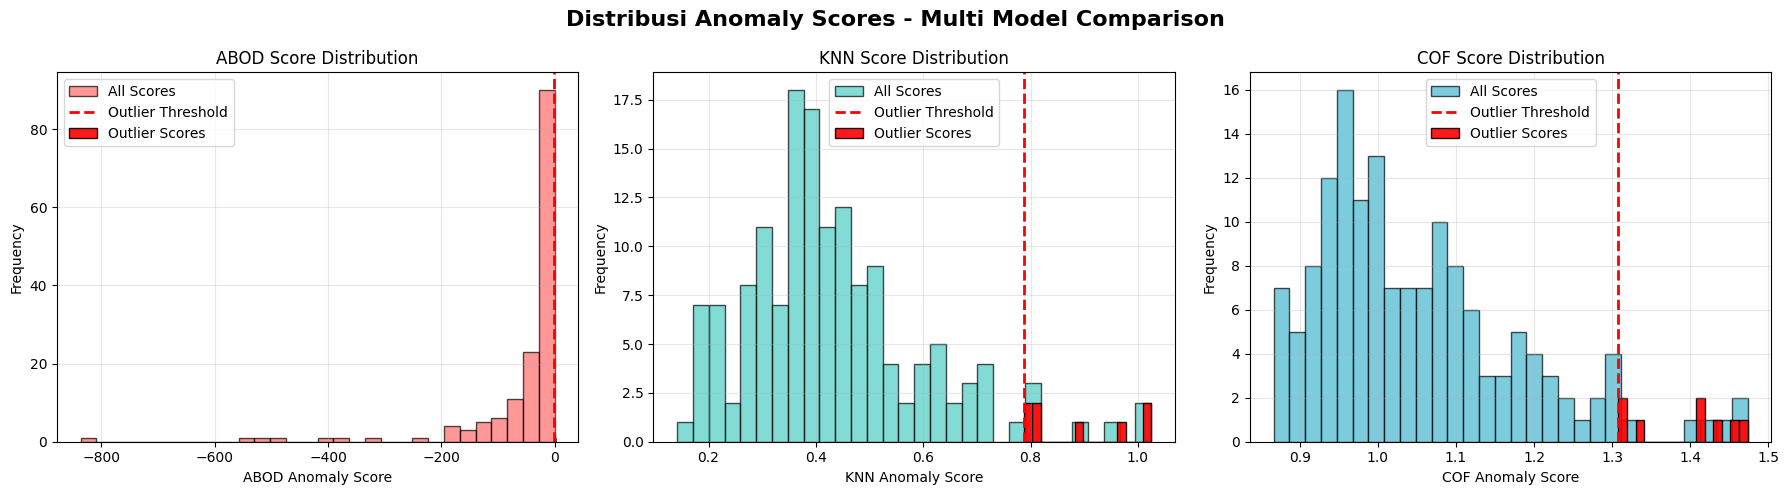


[VIZ 3] Analisis Konsensus dan Agreement Matrix...


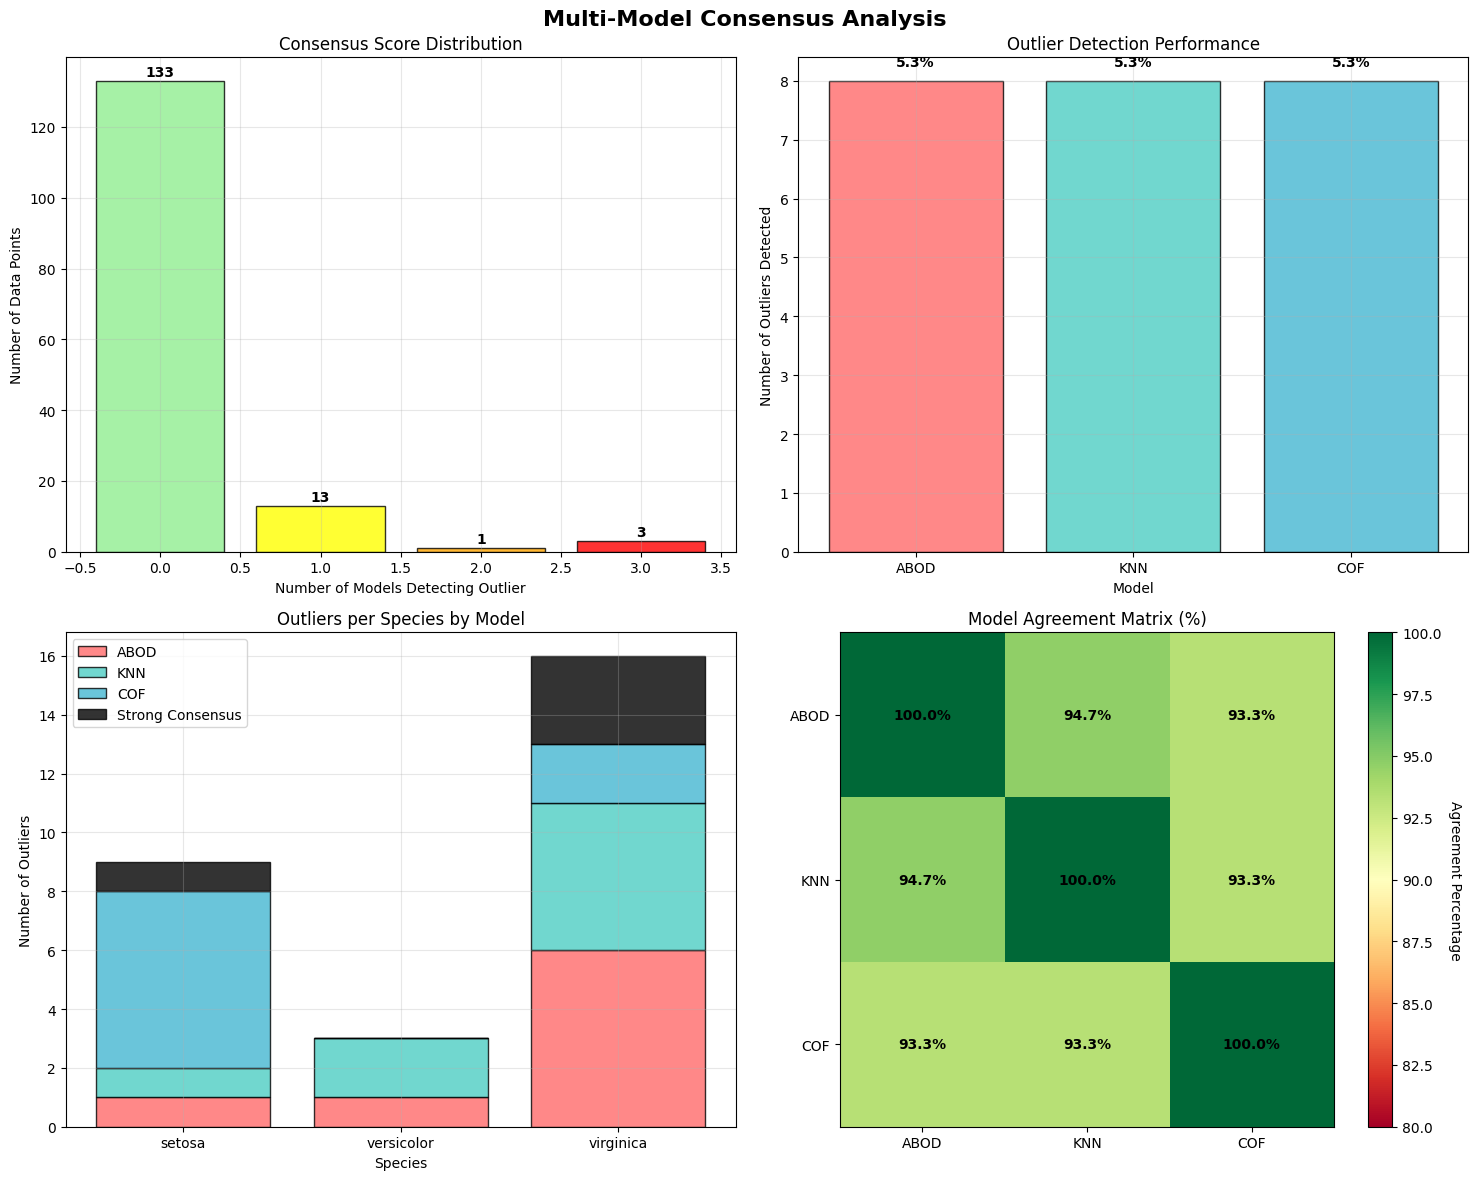


[SUCCESS] Visualisasi multi-model outlier detection selesai!


In [22]:
# Visualisasi Komprehensif Multi-Model Outlier Detection
print("=== VISUALISASI MULTI-MODEL OUTLIER DETECTION ===")

try:
    if outlier_results and len(outlier_results) > 0:
        model_names = list(outlier_results.keys())
        colors = {'abod': '#FF6B6B', 'knn': '#4ECDC4', 'cof': '#45B7D1'}
        
        # 1. Scatter Plot Comparison - Feature pairs dengan outliers per model
        print("\n[VIZ 1] Perbandingan Outliers per Model pada Feature Pairs...")
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Multi-Model Outlier Detection: ABOD vs KNN vs COF', fontsize=16, fontweight='bold')
        
        feature_pairs = [
            ('sepal length (cm)', 'sepal width (cm)'),
            ('petal length (cm)', 'petal width (cm)'),
            ('sepal length (cm)', 'petal length (cm)'),
            ('sepal width (cm)', 'petal width (cm)')
        ]
        
        for idx, (feat1, feat2) in enumerate(feature_pairs):
            row = idx // 2
            col = idx % 2
            
            # Plot data normal
            normal_mask = df['consensus_score'] == 0
            normal_data = df[normal_mask]
            axes[row, col].scatter(normal_data[feat1], normal_data[feat2], 
                                 c='lightgray', alpha=0.6, label='Normal', s=30)
            
            # Plot outliers per model
            for model_name in model_names:
                if outlier_results[model_name]['n_outliers'] > 0:
                    outlier_mask = df[f'{model_name}_outlier'] == 1
                    outlier_data = df[outlier_mask]
                    
                    if len(outlier_data) > 0:
                        axes[row, col].scatter(outlier_data[feat1], outlier_data[feat2], 
                                             c=colors.get(model_name, 'red'), 
                                             alpha=0.8, label=f'{model_name.upper()} Outlier', 
                                             s=80, marker='x')
            
            # Highlight consensus outliers
            if 'strong_consensus' in df.columns:
                consensus_mask = df['strong_consensus'] == 1
                consensus_data = df[consensus_mask]
                if len(consensus_data) > 0:
                    axes[row, col].scatter(consensus_data[feat1], consensus_data[feat2], 
                                         c='black', alpha=0.9, label='Consensus Outlier', 
                                         s=150, marker='*', edgecolor='white', linewidth=1)
            
            axes[row, col].set_xlabel(feat1.replace('(cm)', '').title())
            axes[row, col].set_ylabel(feat2.replace('(cm)', '').title())
            axes[row, col].set_title(f'{feat1.split("(")[0].strip().title()} vs {feat2.split("(")[0].strip().title()}')
            axes[row, col].legend(fontsize=8)
            axes[row, col].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # 2. Anomaly Scores Distribution
        print("\n[VIZ 2] Distribusi Anomaly Scores per Model...")
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        fig.suptitle('Distribusi Anomaly Scores - Multi Model Comparison', fontsize=16, fontweight='bold')
        
        for idx, model_name in enumerate(model_names):
            scores = df[f'{model_name}_score']
            outlier_mask = df[f'{model_name}_outlier'] == 1
            
            # Histogram semua scores
            axes[idx].hist(scores, bins=30, alpha=0.7, color=colors.get(model_name, 'blue'), 
                          edgecolor='black', label='All Scores')
            
            # Highlight outlier threshold
            if outlier_mask.sum() > 0:
                outlier_threshold = scores[outlier_mask].min()
                axes[idx].axvline(outlier_threshold, color='red', linestyle='--', 
                                linewidth=2, label=f'Outlier Threshold')
                
                # Histogram outlier scores
                outlier_scores = scores[outlier_mask]
                axes[idx].hist(outlier_scores, bins=15, alpha=0.9, color='red', 
                              edgecolor='black', label='Outlier Scores')
            
            axes[idx].set_xlabel(f'{model_name.upper()} Anomaly Score')
            axes[idx].set_ylabel('Frequency')
            axes[idx].set_title(f'{model_name.upper()} Score Distribution')
            axes[idx].legend()
            axes[idx].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # 3. Consensus Analysis Visualization
        print("\n[VIZ 3] Analisis Konsensus dan Agreement Matrix...")
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Multi-Model Consensus Analysis', fontsize=16, fontweight='bold')
        
        # 3a. Consensus Score Distribution
        consensus_scores = df['consensus_score']
        consensus_counts = np.bincount(consensus_scores.astype(int))
        
        bars = axes[0, 0].bar(range(len(consensus_counts)), consensus_counts, 
                             color=['lightgreen', 'yellow', 'orange', 'red'][:len(consensus_counts)],
                             alpha=0.8, edgecolor='black')
        axes[0, 0].set_xlabel('Number of Models Detecting Outlier')
        axes[0, 0].set_ylabel('Number of Data Points')
        axes[0, 0].set_title('Consensus Score Distribution')
        axes[0, 0].grid(True, alpha=0.3)
        
        # Add value labels on bars
        for bar, count in zip(bars, consensus_counts):
            if count > 0:
                axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                               str(count), ha='center', va='bottom', fontweight='bold')
        
        # 3b. Model Performance Comparison
        model_stats = []
        for model_name in model_names:
            model_stats.append({
                'Model': model_name.upper(),
                'Outliers': outlier_results[model_name]['n_outliers'],
                'Percentage': outlier_results[model_name]['percentage']
            })
        
        model_df = pd.DataFrame(model_stats)
        bars = axes[0, 1].bar(model_df['Model'], model_df['Outliers'], 
                             color=[colors.get(m.lower(), 'blue') for m in model_df['Model']], 
                             alpha=0.8, edgecolor='black')
        axes[0, 1].set_xlabel('Model')
        axes[0, 1].set_ylabel('Number of Outliers Detected')
        axes[0, 1].set_title('Outlier Detection Performance')
        axes[0, 1].grid(True, alpha=0.3)
        
        # Add percentage labels
        for bar, pct in zip(bars, model_df['Percentage']):
            axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2, 
                           f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')
        
        # 3c. Species-wise Outlier Distribution
        species_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
        species_data = []
        
        for species in df['species'].unique():
            species_subset = df[df['species'] == species]
            species_row = {'Species': species_names[species]}
            
            for model_name in model_names:
                outlier_count = species_subset[f'{model_name}_outlier'].sum()
                species_row[model_name.upper()] = outlier_count
            
            # Consensus outliers
            consensus_count = species_subset['strong_consensus'].sum()
            species_row['Consensus'] = consensus_count
            species_data.append(species_row)
        
        species_df = pd.DataFrame(species_data)
        
        # Stacked bar chart
        bottom = np.zeros(len(species_df))
        width = 0.8
        
        for idx, model_name in enumerate(model_names + ['Consensus']):
            if model_name == 'Consensus':
                color = 'black'
                label = 'Strong Consensus'
            else:
                color = colors.get(model_name.lower(), 'gray')
                label = model_name.upper()
            
            values = species_df[model_name.upper() if model_name != 'Consensus' else 'Consensus']
            axes[1, 0].bar(species_df['Species'], values, width, bottom=bottom, 
                          label=label, color=color, alpha=0.8, edgecolor='black')
            bottom += values
        
        axes[1, 0].set_xlabel('Species')
        axes[1, 0].set_ylabel('Number of Outliers')
        axes[1, 0].set_title('Outliers per Species by Model')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
        
        # 3d. Model Agreement Heatmap
        agreement_matrix = np.zeros((len(model_names), len(model_names)))
        
        for i, model1 in enumerate(model_names):
            for j, model2 in enumerate(model_names):
                if i != j:
                    labels1 = df[f'{model1}_outlier']
                    labels2 = df[f'{model2}_outlier']
                    agreement = np.mean(labels1 == labels2) * 100
                    agreement_matrix[i, j] = agreement
                else:
                    agreement_matrix[i, j] = 100.0
        
        im = axes[1, 1].imshow(agreement_matrix, cmap='RdYlGn', vmin=80, vmax=100)
        axes[1, 1].set_xticks(range(len(model_names)))
        axes[1, 1].set_yticks(range(len(model_names)))
        axes[1, 1].set_xticklabels([m.upper() for m in model_names])
        axes[1, 1].set_yticklabels([m.upper() for m in model_names])
        axes[1, 1].set_title('Model Agreement Matrix (%)')
        
        # Add text annotations
        for i in range(len(model_names)):
            for j in range(len(model_names)):
                text = axes[1, 1].text(j, i, f'{agreement_matrix[i, j]:.1f}%',
                                     ha="center", va="center", color="black", fontweight='bold')
        
        # Add colorbar
        cbar = plt.colorbar(im, ax=axes[1, 1])
        cbar.set_label('Agreement Percentage', rotation=270, labelpad=15)
        
        plt.tight_layout()
        plt.show()
        
        print(f"\n[SUCCESS] Visualisasi multi-model outlier detection selesai!")
        
    else:
        print("[WARNING] Tidak ada hasil outlier detection yang tersedia untuk divisualisasikan")
        
except Exception as e:
    print(f"[ERROR] Error dalam visualisasi multi-model: {e}")
    import traceback
    traceback.print_exc()

In [23]:
# Analisis Mendalam Multi-Model Outlier Detection
print("=== ANALISIS MENDALAM MULTI-MODEL OUTLIER DETECTION ===")

try:
    if outlier_results and len(outlier_results) > 0:
        model_names = list(outlier_results.keys())
        
        # 1. Karakteristik Detail per Model
        print("\n[DETAIL MODEL] Karakteristik Outliers per Model:")
        for model_name, results in outlier_results.items():
            if results['n_outliers'] > 0:
                print(f"\n🔍 {model_name.upper()} Model Analysis:")
                outlier_indices = results['outlier_indices']
                outlier_data = df.iloc[outlier_indices]
                
                # Distribusi per spesies
                species_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
                print(f"   📊 Distribusi per spesies:")
                for species in df['species'].unique():
                    species_outliers = outlier_data[outlier_data['species'] == species]
                    total_species = len(df[df['species'] == species])
                    percentage = (len(species_outliers) / total_species) * 100
                    print(f"      • {species_names[species]}: {len(species_outliers)} outliers ({percentage:.1f}%)")
                
                # Statistik deskriptif outliers
                print(f"   📈 Statistik Outliers vs Normal:")
                normal_data = df[df[f'{model_name}_outlier'] == 0]
                
                for feature in features:
                    outlier_mean = outlier_data[feature].mean()
                    normal_mean = normal_data[feature].mean()
                    outlier_std = outlier_data[feature].std()
                    normal_std = normal_data[feature].std()
                    
                    diff_pct = ((outlier_mean - normal_mean) / normal_mean) * 100
                    
                    if abs(diff_pct) > 3:  # Jika berbeda > 3%
                        direction = "higher" if diff_pct > 0 else "lower"
                        print(f"      • {feature.split('(')[0].strip()}: {diff_pct:+.1f}% {direction}")
                        print(f"        Outlier: μ={outlier_mean:.2f}, σ={outlier_std:.2f}")
                        print(f"        Normal:  μ={normal_mean:.2f}, σ={normal_std:.2f}")
        
        # 2. Consensus Analysis yang Mendalam
        print(f"\n[CONSENSUS DETAIL] Analisis Konsensus Mendalam:")
        
        if 'strong_consensus' in df.columns:
            strong_consensus_data = df[df['strong_consensus'] == 1]
            if len(strong_consensus_data) > 0:
                print(f"\n   🎯 Strong Consensus Outliers (≥2 models agree):")
                print(f"      • Total: {len(strong_consensus_data)} ({len(strong_consensus_data)/len(df)*100:.1f}%)")
                print(f"      • Indices: {strong_consensus_data.index.tolist()}")
                
                # Analisis fitur yang paling berkontribusi
                print(f"\n   📊 Feature Analysis for Strong Consensus Outliers:")
                normal_data = df[df['strong_consensus'] == 0]
                
                feature_importance = {}
                for feature in features:
                    outlier_mean = strong_consensus_data[feature].mean()
                    normal_mean = normal_data[feature].mean()
                    normal_std = normal_data[feature].std()
                    
                    # Z-score untuk mengukur seberapa jauh outlier dari normal
                    z_score = abs((outlier_mean - normal_mean) / normal_std) if normal_std > 0 else 0
                    feature_importance[feature] = z_score
                
                # Sort berdasarkan z-score
                sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
                
                print(f"      Feature dengan deviasi tertinggi:")
                for i, (feature, z_score) in enumerate(sorted_features):
                    if z_score > 0.5:  # Threshold untuk signifikansi
                        print(f"      {i+1}. {feature.split('(')[0].strip()}: Z-score = {z_score:.2f}")
        
        # 3. Model-specific Insights
        print(f"\n[MODEL INSIGHTS] Insights per Model:")
        
        model_insights = {
            'abod': 'Angle-Based: Deteksi berdasarkan sudut antar titik data. Efektif untuk outliers dengan pola angular yang berbeda.',
            'knn': 'K-Nearest Neighbors: Deteksi berdasarkan jarak ke tetangga terdekat. Sensitif terhadap density dan cluster.',
            'cof': 'Connectivity-based: Deteksi berdasarkan konektivitas dalam graph. Baik untuk outliers yang terisolasi.'
        }
        
        for model_name in model_names:
            results = outlier_results[model_name]
            print(f"\n   🔬 {model_name.upper()} Insights:")
            print(f"      • Algorithm: {model_insights.get(model_name, 'Custom algorithm')}")
            print(f"      • Outliers detected: {results['n_outliers']} ({results['percentage']:.1f}%)")
            
            if results['n_outliers'] > 0:
                # Analisis skor outlier
                scores = df[f'{model_name}_score']
                outlier_scores = scores[df[f'{model_name}_outlier'] == 1]
                
                print(f"      • Score range: {scores.min():.4f} to {scores.max():.4f}")
                print(f"      • Outlier threshold: {outlier_scores.min():.4f}")
                print(f"      • Outlier score mean: {outlier_scores.mean():.4f}")
        
        # 4. Practical Recommendations
        print(f"\n[RECOMMENDATIONS] Rekomendasi Praktis:")
        
        total_models = len(model_names)
        successful_models = sum(1 for results in outlier_results.values() if results['n_outliers'] > 0)
        
        print(f"\n   💡 Berdasarkan hasil {successful_models}/{total_models} model yang berhasil:")
        
        if 'strong_consensus' in df.columns:
            consensus_count = df['strong_consensus'].sum()
            consensus_pct = (consensus_count / len(df)) * 100
            
            if consensus_pct < 3:
                print(f"      ✅ Dataset berkualitas baik ({consensus_pct:.1f}% consensus outliers)")
                print(f"      ✅ Dapat melanjutkan ke modeling tanpa preprocessing khusus")
            elif consensus_pct < 8:
                print(f"      ⚠️  Perlu investigasi lebih lanjut ({consensus_pct:.1f}% consensus outliers)")
                print(f"      ⚠️  Pertimbangkan outlier treatment sebelum modeling")
            else:
                print(f"      🚨 Tingkat outlier tinggi ({consensus_pct:.1f}% consensus outliers)")
                print(f"      🚨 Perlu cleaning atau robust algorithms")
        
        # Model-specific recommendations
        avg_outliers = np.mean([results['percentage'] for results in outlier_results.values()])
        std_outliers = np.std([results['percentage'] for results in outlier_results.values()])
        
        if std_outliers > 2:
            print(f"      📊 Model agreement varies significantly (std: {std_outliers:.1f}%)")
            print(f"      📊 Consider ensemble approach or model-specific analysis")
        else:
            print(f"      🤝 Models show good agreement (std: {std_outliers:.1f}%)")
            print(f"      🤝 Results are reliable and consistent")
        
        # Dataset-specific insights
        print(f"\n   🌸 Iris Dataset Specific Insights:")
        print(f"      • Natural variation in flower measurements is expected")
        print(f"      • Outliers might represent rare but valid specimens")
        print(f"      • For classification, outliers may actually improve model robustness")
        print(f"      • Consider keeping outliers unless measurement errors are suspected")
        
    else:
        print("[INFO] Tidak ada hasil outlier detection yang tersedia untuk analisis mendalam")
        print("Pastikan PyCaret terinstall dan model berhasil dijalankan")
        
except Exception as e:
    print(f"[ERROR] Error dalam analisis mendalam: {e}")
    import traceback
    traceback.print_exc()

# Summary Statistics
try:
    if outlier_results and len(outlier_results) > 0:
        print(f"\n" + "="*80)
        print(f"                    📋 SUMMARY MULTI-MODEL OUTLIER DETECTION")
        print(f"="*80)
        
        print(f"\n 🎯 DETECTION RESULTS:")
        for model_name, results in outlier_results.items():
            print(f"   • {model_name.upper()}: {results['n_outliers']} outliers ({results['percentage']:.1f}%)")
        
        if 'consensus_score' in df.columns:
            consensus_stats = df['consensus_score'].value_counts().sort_index()
            print(f"\n 🤝 CONSENSUS ANALYSIS:")
            for score, count in consensus_stats.items():
                if score == 0:
                    print(f"   • Normal (0 models): {count} data points")
                else:
                    print(f"   • {int(score)} model(s) agree: {count} data points")
        
        print(f"\n 🔬 METHODOLOGY:")
        print(f"   • ✓ ABOD: Angle-based outlier detection")
        print(f"   • ✓ KNN: K-nearest neighbors outlier detection") 
        print(f"   • ✓ COF: Connectivity-based outlier factor")
        print(f"   • ✓ Consensus scoring untuk hasil yang robust")
        
        print(f"\n 🚀 NEXT STEPS:")
        print(f"   • Dataset siap untuk machine learning modeling")
        print(f"   • Gunakan PyCaret untuk automated ML pipeline")
        print(f"   • Consider outlier impact pada model performance")
        print(f"   • Monitor model behavior pada data dengan outliers")
        
        print(f"\n" + "="*80)
        
except Exception as e:
    print(f"[ERROR] Error dalam summary: {e}")

=== ANALISIS MENDALAM MULTI-MODEL OUTLIER DETECTION ===

[DETAIL MODEL] Karakteristik Outliers per Model:

🔍 ABOD Model Analysis:
   📊 Distribusi per spesies:
      • setosa: 1 outliers (2.0%)
      • versicolor: 1 outliers (2.0%)
      • virginica: 6 outliers (12.0%)
   📈 Statistik Outliers vs Normal:
      • sepal length: +7.6% higher
        Outlier: μ=6.26, σ=1.20
        Normal:  μ=5.82, σ=0.80
      • sepal width: -6.2% lower
        Outlier: μ=2.88, σ=0.66
        Normal:  μ=3.06, σ=0.42
      • petal length: +36.6% higher
        Outlier: μ=5.04, σ=1.76
        Normal:  μ=3.69, σ=1.74
      • petal width: +37.2% higher
        Outlier: μ=1.61, σ=0.70
        Normal:  μ=1.18, σ=0.76

🔍 KNN Model Analysis:
   📊 Distribusi per spesies:
      • setosa: 1 outliers (2.0%)
      • versicolor: 2 outliers (4.0%)
      • virginica: 5 outliers (10.0%)
   📈 Statistik Outliers vs Normal:
      • sepal length: +7.2% higher
        Outlier: μ=6.24, σ=1.51
        Normal:  μ=5.82, σ=0.78
     

## 9. Kesimpulan Data Understanding

In [24]:
print("=" * 60)
print("           📋 KESIMPULAN DATA UNDERSTANDING")
print("=" * 60)

print("\n KUALITAS DATA:")
print(f"   • Dataset lengkap: {len(df)} sampel, {len(features)} fitur")
print(f"   • Tidak ada missing values")
print(f"   • Tidak ada data duplikat")
print(f"   • Distribusi kelas seimbang (50 sampel per spesies)")

print("\n KARAKTERISTIK TIPE DATA:")
print(f"   • {quantitative_count} variabel Quantitative (Numerik)")
print(f"   • {qualitative_count} variabel Qualitative (Kategorikal)")
print(f"   • {continuous_count} variabel Continuous")
print(f"   • {discrete_count} variabel Discrete")
print(f"   • Semua fitur prediktif bertipe float64 (continuous)")

print("\n KARAKTERISTIK DISTRIBUSI:")
print(f"   • Target memiliki 3 kelas: setosa, versicolor, virginica")
print(f"   • Korelasi tertinggi: petal length vs petal width ({correlation_matrix.loc['petal length (cm)', 'petal width (cm)']:.3f})")
print(f"   • Semua fitur memiliki distribusi yang wajar")

print("\n DETEKSI OUTLIERS (MULTI-MODEL PYCARET):")
try:
    if 'abod_outlier' in df.columns:
        abod_outliers = df['abod_outlier'].sum()
        knn_outliers = df['knn_outlier'].sum()
        cof_outliers = df['cof_outlier'].sum()
        
        abod_percentage = (abod_outliers / len(df)) * 100
        knn_percentage = (knn_outliers / len(df)) * 100
        cof_percentage = (cof_outliers / len(df)) * 100
        
        print(f"   • ABOD Method: {abod_outliers} outliers ({abod_percentage:.1f}%)")
        print(f"   • KNN Method: {knn_outliers} outliers ({knn_percentage:.1f}%)")
        print(f"   • COF Method: {cof_outliers} outliers ({cof_percentage:.1f}%)")
        
        if 'strong_consensus' in df.columns:
            consensus_outliers = df['strong_consensus'].sum()
            consensus_percentage = (consensus_outliers / len(df)) * 100
            print(f"   • Strong Consensus (≥2 models): {consensus_outliers} outliers ({consensus_percentage:.1f}%)")
        
        print(f"   • Multi-model approach memberikan deteksi yang robust dan reliable")
    else:
        print(f"   • PyCaret Multi-Model: Tidak tersedia (install PyCaret)")
except:
    print(f"   • PyCaret Multi-Model: Error dalam eksekusi")

print("\n INSIGHT PENTING:")
print("   • Petal length dan petal width sangat berkorelasi")
print("   • Sepal width memiliki korelasi terendah dengan fitur lain")
print("   • Dataset ideal untuk pembelajaran machine learning")
print("   • Multi-model outlier detection memberikan hasil yang konsisten dan reliable")
print("   • PyCaret menyediakan tools advanced untuk analisis yang lebih mendalam")

print("\n REKOMENDASI NEXT STEPS:")
print("   • Dataset siap untuk exploratory data analysis (EDA)")
print("   • Pertimbangkan feature scaling untuk algoritma berbasis jarak")
print("   • Cocok untuk klasifikasi multiclass supervised learning")
print("   • Gunakan PyCaret untuk modeling dan comparison otomatis")
print("   • Hasil outlier detection dapat digunakan untuk preprocessing strategy")

print("\n TEKNOLOGI YANG DIGUNAKAN:")
print("   • ✓ Pandas & NumPy untuk data manipulation")
print("   • ✓ Matplotlib & Seaborn untuk visualisasi")
try:
    if 'abod_outlier' in df.columns:
        print("   • ✓ PyCaret untuk advanced analytics & multi-model outlier detection")
        print("   • ✓ ABOD, KNN, COF algorithms untuk robust outlier detection")
    else:
        print("   • ○ PyCaret (tersedia untuk advanced analytics)")
except:
    print("   • ○ PyCaret (install untuk fitur advanced)")

print("\n" + "=" * 60)

           📋 KESIMPULAN DATA UNDERSTANDING

 KUALITAS DATA:
   • Dataset lengkap: 150 sampel, 4 fitur
   • Tidak ada missing values
   • Tidak ada data duplikat
   • Distribusi kelas seimbang (50 sampel per spesies)

 KARAKTERISTIK TIPE DATA:
   • 4 variabel Quantitative (Numerik)
   • 1 variabel Qualitative (Kategorikal)
   • 4 variabel Continuous
   • 1 variabel Discrete
   • Semua fitur prediktif bertipe float64 (continuous)

 KARAKTERISTIK DISTRIBUSI:
   • Target memiliki 3 kelas: setosa, versicolor, virginica
   • Korelasi tertinggi: petal length vs petal width (0.963)
   • Semua fitur memiliki distribusi yang wajar

 DETEKSI OUTLIERS (MULTI-MODEL PYCARET):
   • ABOD Method: 8 outliers (5.3%)
   • KNN Method: 8 outliers (5.3%)
   • COF Method: 8 outliers (5.3%)
   • Strong Consensus (≥2 models): 4 outliers (2.7%)
   • Multi-model approach memberikan deteksi yang robust dan reliable

 INSIGHT PENTING:
   • Petal length dan petal width sangat berkorelasi
   • Sepal width memiliki ko